In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import datetime

### Extracting data from files and putting into DataFrames

In [119]:
xls_files = glob.glob('FitbitData/*.xls')
activities = [pd.ExcelFile(xls).parse('Activities', index_col=0, parse_dates=True) for xls in xls_files]
sleep = [pd.ExcelFile(xls).parse('Sleep', usecols=':F') for xls in xls_files]
#sleep = [pd.ExcelFile(xls).parse('Sleep', usecols=':F', index_col=[0,1], parse_dates=True) for xls in xls_files]
#sleep = [pd.ExcelFile(xls).parse('Sleep', usecols=':F', index_col=0, parse_dates=True) for xls in xls_files]

activities_df = pd.DataFrame()
sleep_df = pd.DataFrame()

for monthly_activity in activities:
    df = pd.DataFrame(monthly_activity)
    activities_df = activities_df.append(df)
    
for monthly_sleep in sleep:
    monthly_sleep = monthly_sleep#.sort_index(ascending=True)
    df = pd.DataFrame(monthly_sleep).sort_values(by='Start Time', ascending=True)
    sleep_df = sleep_df.append(df)

sleep_df['Start Time'] = pd.to_datetime(sleep_df['Start Time'])
sleep_df['End Time'] = pd.to_datetime(sleep_df['End Time'])
#activities_df.head()

In [75]:
#sleep_df.head()

### Splitting data into 2 dataframes (America & Korea)

In [135]:
america_activity = activities_df.loc[:'2017-03']
korea_activity = activities_df.loc['2017-04':]

# ----- This doesn't work. It only works if I have 'Start Time' set as the index. A bit confused here -----
#america_sleep = sleep_df['Start Time'].loc[:'2017-03']
#korea_sleep = sleep_df['Start Time'].loc['2017-04':]

### Cleaning dataframe

In [141]:
# CHECK IF 'STEPS' = 0. IF SO, DID NOT ENTER DATA FOR THAT DAY
# ------------------------------------------------------------
#america[america['Steps'] == '0']
#korea[korea['Steps'] == '0']

# REPLACE 0 WITH AVERAGE
# ----------------------
america_activity.replace(0, america_activity.mean())#.fillna(america.mean())

def remove_comma(df, cols):
    for col in cols:
        df[col] = df[col].str.replace(',', '')
        df[col] = pd.to_numeric(df[col])

remove_comma(america_activity, ['Calories Burned', 'Steps', 'Minutes Sedentary', 'Activity Calories'])
remove_comma(korea_activity, ['Calories Burned', 'Steps', 'Minutes Sedentary', 'Activity Calories'])

/Users/vwu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/vwu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


### Adding weekday column to Activity dataframe

In [142]:
def add_weekday(df):
    weekday = []
    for date in df.index:
        weekday.append(datetime.datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').strftime('%A'))
    #america['Weekday'] = weekday
    df.loc[:, 'Weekday'] = weekday

add_weekday(america_activity)
add_weekday(korea_activity)
america_activity.tail()

/Users/vwu/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Weekday
Date,,,,,,,,,,
2017-03-27,2018,14160,6.32,0,580.0,303,13,12,1108,Monday
2017-03-28,2260,18632,8.57,0,659.0,283,21,72,1388,Tuesday
2017-03-29,1751,8539,3.90,0,647.0,242,6,13,785,Wednesday
2017-03-30,1872,10303,4.34,0,700.0,326,3,15,973,Thursday
2017-03-31,1440,3751,1.54,0,1053.0,137,0,0,373,Friday


## ANALYZING

### Analyzing by day of week

In [207]:
ACTIVITY_LEVELS = ['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']

In [143]:
america_activity.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,974.000000,974.000000,974.000000,974.0,337.000000,974.000000,974.000000,974.000000,974.000000
mean,2075.749487,11443.521561,4.843573,0.0,814.557864,209.127310,28.634497,33.885010,969.207392
std,321.748944,5053.737135,2.170096,0.0,263.196147,81.963558,31.766813,30.315557,373.288696
min,1180.000000,0.000000,0.000000,0.0,412.000000,0.000000,0.000000,0.000000,0.000000
25%,1880.000000,8860.250000,3.695000,0.0,666.000000,162.000000,6.000000,11.000000,805.250000
50%,2085.000000,11025.500000,4.665000,0.0,746.000000,222.000000,16.000000,27.000000,956.000000
75%,2252.750000,13982.000000,5.917500,0.0,807.000000,260.000000,44.000000,49.000000,1165.750000
max,3447.000000,34894.000000,15.010000,0.0,1440.000000,456.000000,175.000000,210.000000,2578.000000


In [144]:
korea_activity.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,456.000000,456.000000,456.000000,456.0,30.000000,456.000000,456.000000,456.000000,456.000000
mean,2148.581140,16907.307018,7.203421,0.0,673.933333,252.611842,34.728070,70.344298,1242.043860
std,284.342075,6070.517112,2.539160,0.0,120.865252,52.533156,28.193768,39.188778,342.707889
min,1551.000000,5190.000000,2.160000,0.0,412.000000,120.000000,0.000000,4.000000,508.000000
25%,1962.000000,13012.750000,5.570000,0.0,605.500000,217.000000,15.750000,43.750000,1016.750000
50%,2103.000000,15795.500000,6.815000,0.0,676.500000,252.000000,26.000000,66.000000,1189.000000
75%,2269.500000,19332.750000,8.307500,0.0,719.500000,284.000000,47.250000,88.000000,1400.750000
max,3393.000000,43790.000000,18.830000,0.0,1110.000000,446.000000,192.000000,262.000000,2680.000000


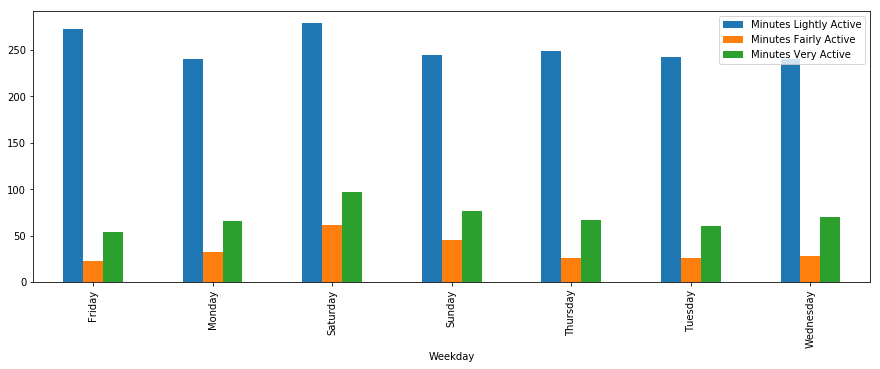

In [215]:
korea_activity.groupby('Weekday').mean().plot(kind='bar', y=ACTIVITY_LEVELS, figsize=(15,5))

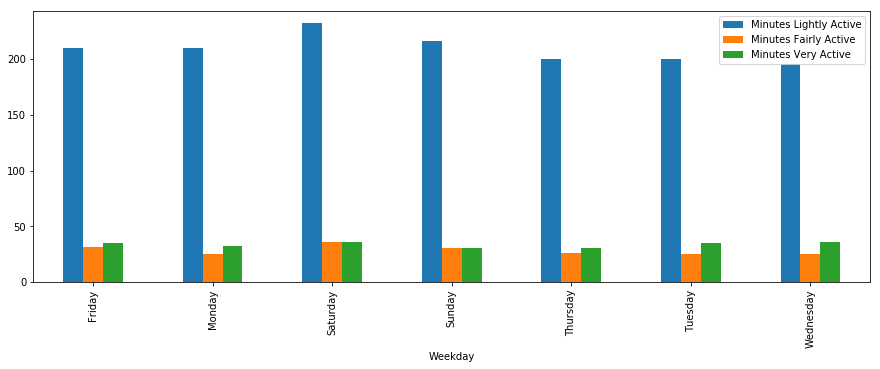

In [209]:
america_activity.groupby('Weekday').mean().plot(kind='bar', y=ACTIVITY_LEVELS, figsize=(15,5))

### Resampling data by month

([<matplotlib.axis.XTick at 0x11a215c18>,
 <a list of 4 Text xticklabel objects>)

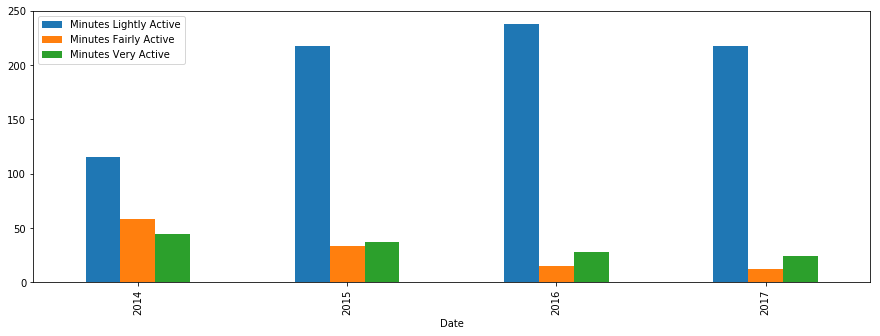

In [210]:
monthly_america = america_activity.resample('M').mean()
monthly_korea = korea_activity.resample('M').mean()

july = korea_activity['2017-07']

#america['Minutes Very Active'].plot(figsize=(30,10))
#plt.figure(figsize=(200, 14)) 

america_yearly = america_activity.resample('Y').mean()
america_yearly.plot(kind='bar', y=ACTIVITY_LEVELS, figsize=(15,5))
plt.xticks([0, 1, 2, 3], ['2014', '2015', '2016', '2017'])

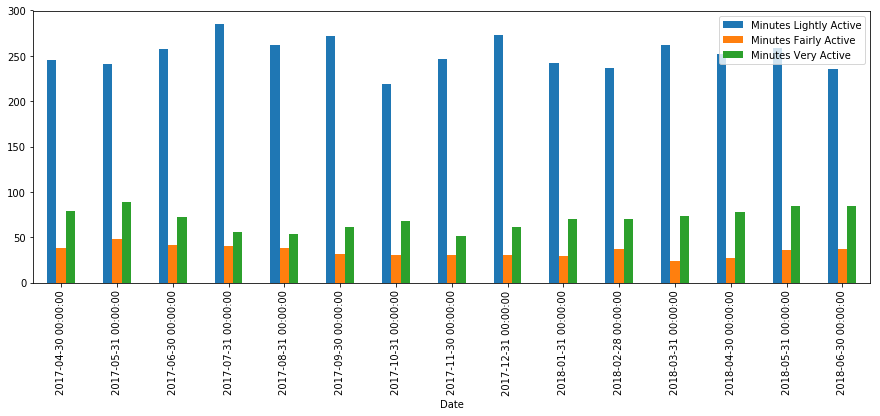

In [211]:
korea_yearly = korea_activity.resample('M').mean()
korea_yearly.plot(kind='bar', y=ACTIVITY_LEVELS, figsize=(15,5))
#plt.xticks([0, 1, 2, 3], ['2014', '2015', '2016', '2017'])

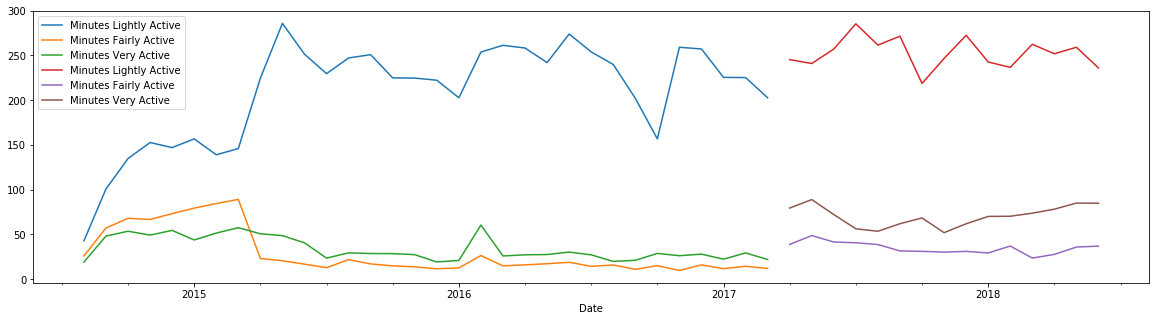

In [213]:
amer_ax = monthly_america.plot(y=ACTIVITY_LEVELS)
monthly_korea.plot(y=ACTIVITY_LEVELS, figsize=(20,5),ax=amer_ax)

In [57]:
#pd.to_numeric(america['Calories Burned'], errors='coerce')
america_activity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 974 entries, 2014-08-01 to 2017-03-31
Data columns (total 10 columns):
Calories Burned           974 non-null int64
Steps                     974 non-null int64
Distance                  974 non-null float64
Floors                    974 non-null int64
Minutes Sedentary         337 non-null float64
Minutes Lightly Active    974 non-null int64
Minutes Fairly Active     974 non-null int64
Minutes Very Active       974 non-null int64
Activity Calories         974 non-null int64
Weekday                   974 non-null object
dtypes: float64(2), int64(7), object(1)
memory usage: 83.7+ KB


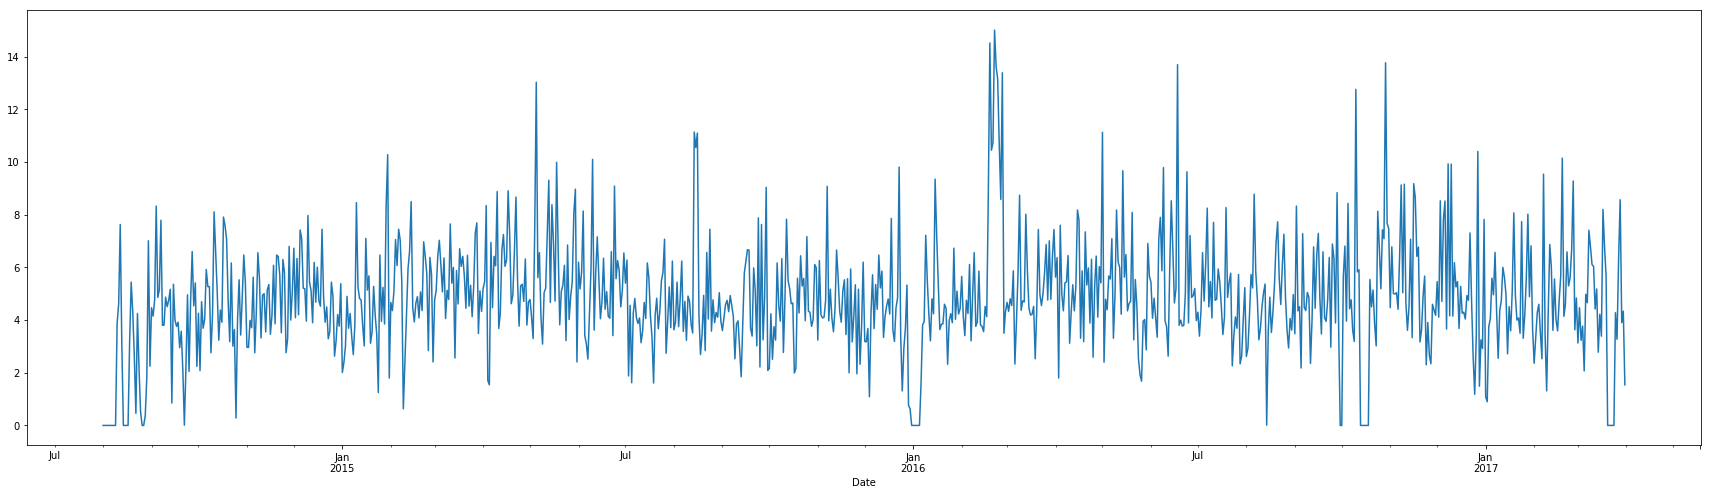

In [58]:
america_activity['Distance'].plot(figsize=(30,8))

In [61]:
#sleep_df['Start Time'] = pd.to_datetime(sleep_df['Start Time'])
#sleep_df['End Time'] = pd.to_datetime(sleep_df['End Time'])

In [123]:
sleep_df['End Time'] - sleep_df['Start Time']
sleep_df

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed
15,2014-08-10 22:38:00,2014-08-11 07:27:00,475,43,2,529
16,2014-08-10 00:04:00,2014-08-10 07:56:00,443,5,1,472
13,2014-08-12 23:15:00,2014-08-13 07:35:00,463,24,2,500
14,2014-08-12 00:13:00,2014-08-12 07:13:00,367,29,3,420
12,2014-08-13 23:35:00,2014-08-14 07:34:00,479,0,0,479
11,2014-08-14 23:52:00,2014-08-15 07:36:00,464,0,0,464
10,2014-08-15 23:24:00,2014-08-16 08:17:00,36,0,0,533
9,2014-08-16 23:57:00,2014-08-17 08:51:00,534,0,0,534
8,2014-08-17 23:22:00,2014-08-18 07:28:00,486,0,0,486
7,2014-08-18 23:40:00,2014-08-19 07:31:00,449,8,1,471
